# Clasificación de la especie *Iris Setosa* ...

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
session = tf.Session()

## Carga y manipulación de datos...

In [3]:
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris2d = np.array([[x[2], x[3]] for x in iris.data])

## Declarar variables...

In [4]:
batch_size = 20
x1_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

## Crear el modelo...
$$x_2 = Ax_1 + b \Rightarrow x_2 - Ax_1 - b = 0$$

In [5]:
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [6]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_prediction = tf.subtract(x1_data, my_add)

## Función de pérdidas y propagación hacia atrás...

In [7]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_prediction, labels = y_target)
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
train_step = my_optimizer.minimize(xentropy)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Inicializar variables...

In [8]:
init = tf.global_variables_initializer()
session.run(init)

## Entrenar el modelo...

In [9]:
for i in range(1000):
    rand_idx = np.random.choice(len(iris2d), size = batch_size)
    rand_x = iris2d[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_idx]])
    session.run(train_step, feed_dict = {x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if (i + 1) % 100 == 0:
        print("Paso # " + str(i + 1) + ", A = " + str(session.run(A)) + ", b = " + str(session.run(b)))

Paso # 100, A = [[7.303435]], b = [[-2.2836423]]
Paso # 200, A = [[8.723068]], b = [[-3.387361]]
Paso # 300, A = [[9.534821]], b = [[-4.1929646]]
Paso # 400, A = [[10.218703]], b = [[-4.651631]]
Paso # 500, A = [[10.714326]], b = [[-5.088145]]
Paso # 600, A = [[11.215446]], b = [[-5.341242]]
Paso # 700, A = [[11.5062]], b = [[-5.746]]
Paso # 800, A = [[11.873034]], b = [[-5.9532676]]
Paso # 900, A = [[12.130873]], b = [[-6.2160544]]
Paso # 1000, A = [[12.377299]], b = [[-6.4344296]]


## Modelo final...

In [10]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

## Representación de la separación...

In [11]:
x = np.linspace(0, 3, num = 100)
abline_values = []
for i in x:
    abline_values.append(slope * i + intercept)

setosa_x = [a[1] for i, a in enumerate(iris2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris2d) if binary_target[i] == 1]

no_setosa_x = [a[1] for i, a in enumerate(iris2d) if binary_target[i] == 0]
no_setosa_y = [a[0] for i, a in enumerate(iris2d) if binary_target[i] == 0]

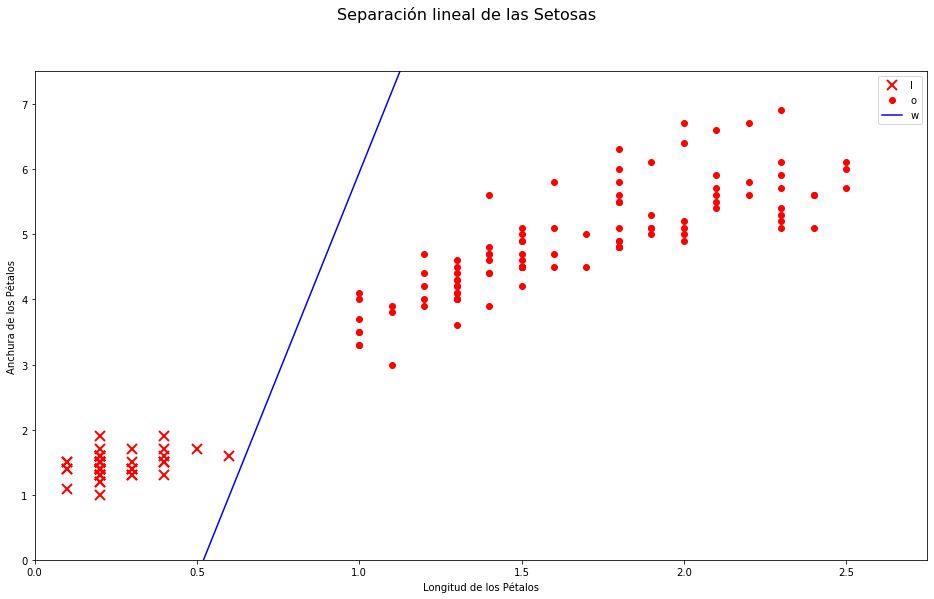

In [13]:
plt.figure(figsize = (16, 9))
plt.plot(setosa_x, setosa_y, "rx", ms = 10, mew = 2, label = "Setosa")
plt.plot(no_setosa_x, no_setosa_y, "ro", label = "No Setosa")
plt.plot(x, abline_values, "b-")
plt.suptitle("Separación lineal de las Setosas", fontsize = 16)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los Pétalos")
plt.legend("lower right")
plt.xlim([0.0, 2.75])
plt.ylim([0.0, 7.5])
plt.show()